# Importing Packages

In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Loading Dataset

In [371]:
traffic_data = pd.read_csv('../../data/US_Accidents_March23_sampled_500k.csv')

In [372]:
print(traffic_data)

               ID   Source  Severity                     Start_Time  \
0       A-2047758  Source2         2            2019-06-12 10:10:56   
1       A-4694324  Source1         2  2022-12-03 23:37:14.000000000   
2       A-5006183  Source1         2  2022-08-20 13:13:00.000000000   
3       A-4237356  Source1         2            2022-02-21 17:43:04   
4       A-6690583  Source1         2            2020-12-04 01:46:00   
...           ...      ...       ...                            ...   
499995  A-6077227  Source1         2            2021-12-15 07:30:00   
499996  A-6323243  Source1         2            2021-12-19 16:25:00   
499997  A-3789256  Source1         2            2022-04-13 19:28:29   
499998  A-7030381  Source1         3            2020-05-15 17:20:56   
499999  A-5438901  Source1         2            2022-04-02 23:23:13   

                             End_Time  Start_Lat   Start_Lng    End_Lat  \
0                 2019-06-12 10:55:58  30.641211  -91.153481        NaN 

# Data Cleaning

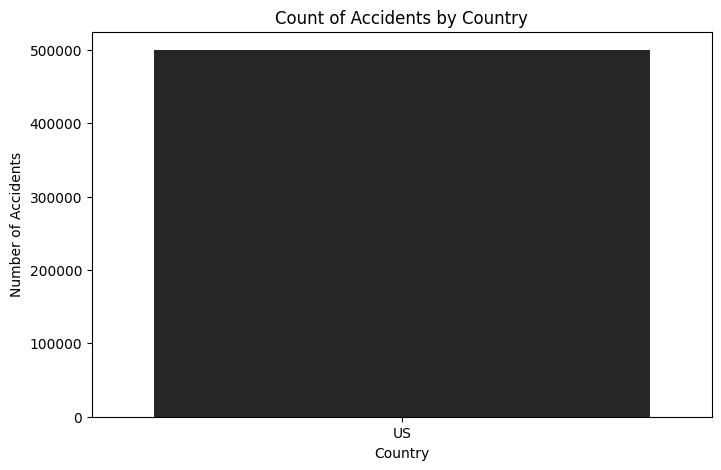

In [373]:
# Bar chart of country
country_counts = traffic_data['Country'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=country_counts.index, y=country_counts.values, hue=country_counts.index, palette='dark:skyblue')

plt.xlabel("Country")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by Country")
plt.show()

## Drop useless columns

In [374]:
traffic_data = traffic_data.drop(['Source', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Street', 'County', 'Country', 'Timezone', 'Airport_Code', 'Wind_Chill(F)', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'ID','Description'], axis=1)
print(traffic_data.shape)

(500000, 29)


## Removing Missing Values

In [375]:
print(traffic_data.columns)

Index(['Severity', 'Start_Time', 'End_Time', 'Distance(mi)', 'City', 'State',
       'Zipcode', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'],
      dtype='object')


In [376]:
missing_values = traffic_data.isnull().sum()
print(missing_values[missing_values > 0], '\n')

missing_percentage = (traffic_data.isna().sum() / len(traffic_data)) * 100
print(missing_percentage.sort_values(ascending=False))

City                     19
Zipcode                 116
Weather_Timestamp      7674
Temperature(F)        10466
Humidity(%)           11130
Pressure(in)           8928
Visibility(mi)        11291
Wind_Direction        11197
Wind_Speed(mph)       36987
Precipitation(in)    142616
Weather_Condition     11101
dtype: int64 

Precipitation(in)    28.5232
Wind_Speed(mph)       7.3974
Visibility(mi)        2.2582
Wind_Direction        2.2394
Humidity(%)           2.2260
Weather_Condition     2.2202
Temperature(F)        2.0932
Pressure(in)          1.7856
Weather_Timestamp     1.5348
Zipcode               0.0232
City                  0.0038
Stop                  0.0000
Junction              0.0000
Traffic_Calming       0.0000
Traffic_Signal        0.0000
Station               0.0000
Roundabout            0.0000
Railway               0.0000
No_Exit               0.0000
Severity              0.0000
Give_Way              0.0000
Crossing              0.0000
Bump                  0.0000
Amenity   

In [377]:
traffic_data_cleaned = traffic_data.dropna()
print(traffic_data_cleaned.shape)

(348687, 29)


## Data Sampling

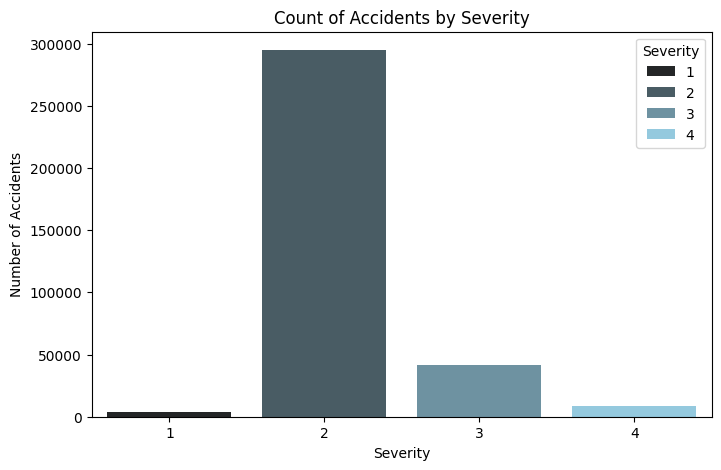

In [378]:
# Bar chart of severity
severity_counts = traffic_data_cleaned['Severity'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=severity_counts.index, y=severity_counts.values, hue=severity_counts.index, palette='dark:skyblue')

plt.xlabel("Severity")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by Severity")
plt.show()

In [379]:
print(severity_counts.values)
print(severity_counts.index)

[294796  41575   8388   3928]
Index([2, 3, 4, 1], dtype='int64', name='Severity')


### Random Sampling for Valid-Test set
Sample valid and test set first to keep original class distribution

In [380]:
valid_test_df = traffic_data_cleaned.sample(n=2000, random_state=42)

## dropped rows of data that are being used for valid-test set
remaining_df = traffic_data_cleaned.drop(valid_test_df.index)

print(valid_test_df.shape)

# valid_df, test_df = train_test_split(valid_test_df, test_size=0.5, random_state=42)

(2000, 29)


In [381]:
print(len(remaining_df))

346687


### Stratefied Sampling for Training set to ensure balanced training data
Use the remaining dataset from previous step, avoid overlapping data in train-test sets

In [382]:
train_df = remaining_df.groupby('Severity', group_keys=False).apply(lambda x: x.sample(2000, random_state=42))

print(train_df.shape)
# remaining_df = traffic_data_cleaned.drop(train_df.index)

(8000, 29)


/var/folders/m_/kb9mf0b90hb2fvtfccyd41fr0000gn/T/ipykernel_51433/1056142904.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_df = remaining_df.groupby('Severity', group_keys=False).apply(lambda x: x.sample(2000, random_state=42))


### Visualize Class Distribution

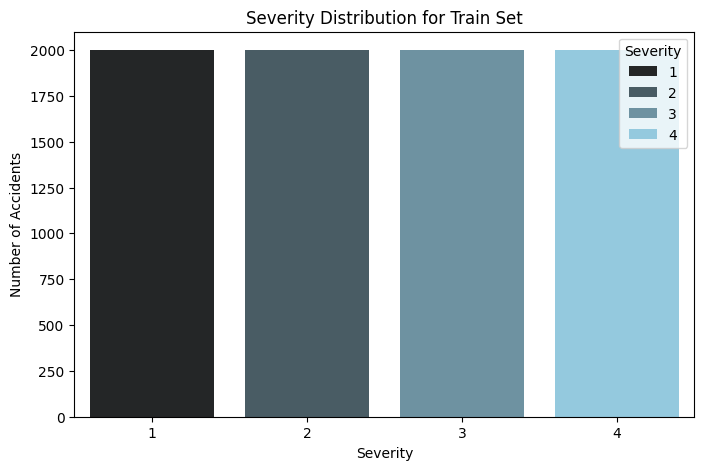

In [383]:
# Bar chart of severity
severity_counts = train_df['Severity'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=severity_counts.index, y=severity_counts.values, hue=severity_counts.index, palette='dark:skyblue')

plt.xlabel("Severity")
plt.ylabel("Number of Accidents")
plt.title("Severity Distribution for Train Set")
plt.show()

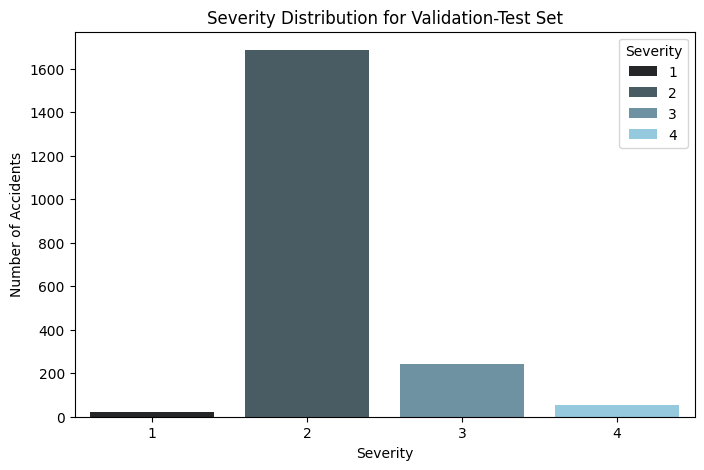

In [384]:
severity_counts = valid_test_df['Severity'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=severity_counts.index, y=severity_counts.values, hue=severity_counts.index, palette='dark:skyblue')

plt.xlabel("Severity")
plt.ylabel("Number of Accidents")
plt.title("Severity Distribution for Validation-Test Set")
plt.show()

# Data Preparation

In [385]:
## Combine the dataset first since we would need to go through some standardized data preprocessing
sampled_data = pd.concat([train_df, valid_test_df], axis=0)
print(sampled_data.shape)

(10000, 29)


In [386]:
# Check data type of Start_Time
print(sampled_data['Start_Time'].dtype)

#Convert Start_Time to datetime
sampled_data['Start_Time'] = sampled_data['Start_Time'].str.split('.').str[0]  # Remove nanoseconds
sampled_data['Start_Time'] = pd.to_datetime(sampled_data['Start_Time'], format='%Y-%m-%d %H:%M:%S')

# Check data type of Start_Time
print(sampled_data['Start_Time'].dtype)

object
datetime64[ns]


In [387]:
# Check data type of End_Time
print(sampled_data['End_Time'].dtype)

#Convert End_Time to datetime
sampled_data['End_Time'] = sampled_data['End_Time'].str.split('.').str[0]  # Remove nanoseconds
sampled_data['End_Time'] = pd.to_datetime(sampled_data['End_Time'], format='%Y-%m-%d %H:%M:%S')

# Check data type of End_Time
print(sampled_data['End_Time'].dtype)

object
datetime64[ns]


## Compute Duration Column using Start_Time and End_Time

In [388]:
sampled_data['Duration'] = sampled_data['End_Time'] - sampled_data['Start_Time']

print(sampled_data['Duration'])

239235   0 days 00:30:00
355666   0 days 00:15:00
246955   0 days 00:29:40
264362   0 days 00:29:36
195152   0 days 01:16:59
               ...      
395634   0 days 02:11:15
492951   0 days 05:10:04
15664    0 days 01:39:00
393801   0 days 00:36:00
423606   0 days 01:51:30
Name: Duration, Length: 10000, dtype: timedelta64[ns]


In [389]:
# duration in minutes
sampled_data['Duration'] = sampled_data['Duration'].dt.total_seconds() / 60

print(sampled_data['Duration'])

239235     30.000000
355666     15.000000
246955     29.666667
264362     29.600000
195152     76.983333
             ...    
395634    131.250000
492951    310.066667
15664      99.000000
393801     36.000000
423606    111.500000
Name: Duration, Length: 10000, dtype: float64


/var/folders/m_/kb9mf0b90hb2fvtfccyd41fr0000gn/T/ipykernel_51433/3345560676.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sampled_data, x='Severity', y='Duration', palette='dark:skyblue')


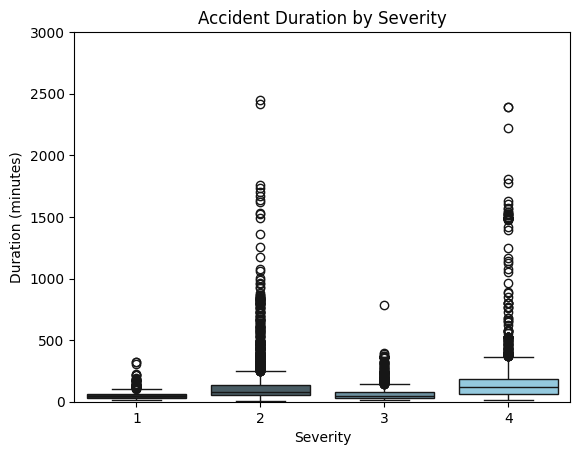

In [390]:
sns.boxplot(data=sampled_data, x='Severity', y='Duration', palette='dark:skyblue')
plt.ylim(0, 3000)  # Limit extreme values for readability
plt.title("Accident Duration by Severity")
plt.xlabel("Severity")
plt.ylabel("Duration (minutes)")  # if you converted it
plt.show()


## Data Encoding for Start_Time Column (convert to minutes after midnight)

In [391]:
#Convert to Minutes After Midnight
sampled_data['Start_Time'] = (
    sampled_data['Start_Time'].dt.hour * 60 + sampled_data['Start_Time'].dt.minute
)

print(sampled_data['Start_Time'])

239235      33
355666     484
246955     809
264362     458
195152     349
          ... 
395634     861
492951     354
15664     1251
393801     832
423606     413
Name: Start_Time, Length: 10000, dtype: int32


/var/folders/m_/kb9mf0b90hb2fvtfccyd41fr0000gn/T/ipykernel_51433/596301918.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sampled_data, x='Severity', y='Start_Time', palette='dark:skyblue')


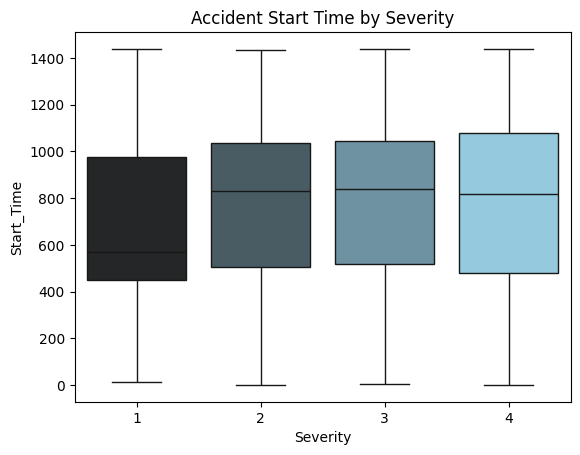

In [392]:
sns.boxplot(data=sampled_data, x='Severity', y='Start_Time', palette='dark:skyblue')
plt.title("Accident Start Time by Severity")
plt.show()


## Data Encoding for End_Time Column (convert to minutes after midnight)

In [393]:
#Convert to Minutes After Midnight
sampled_data['End_Time'] = (
    sampled_data['End_Time'].dt.hour * 60 + sampled_data['End_Time'].dt.minute
)

print(sampled_data['End_Time'])

239235      63
355666     499
246955     839
264362     488
195152     426
          ... 
395634     992
492951     664
15664     1350
393801     868
423606     525
Name: End_Time, Length: 10000, dtype: int32


/var/folders/m_/kb9mf0b90hb2fvtfccyd41fr0000gn/T/ipykernel_51433/1886448690.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sampled_data, x='Severity', y='End_Time', palette='dark:skyblue')


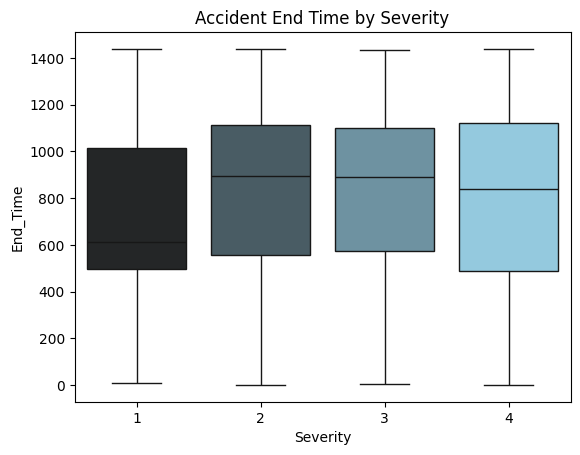

In [394]:
sns.boxplot(data=sampled_data, x='Severity', y='End_Time', palette='dark:skyblue')
plt.title("Accident End Time by Severity")
plt.show()


## Encode Zipcode into Region using First Digit

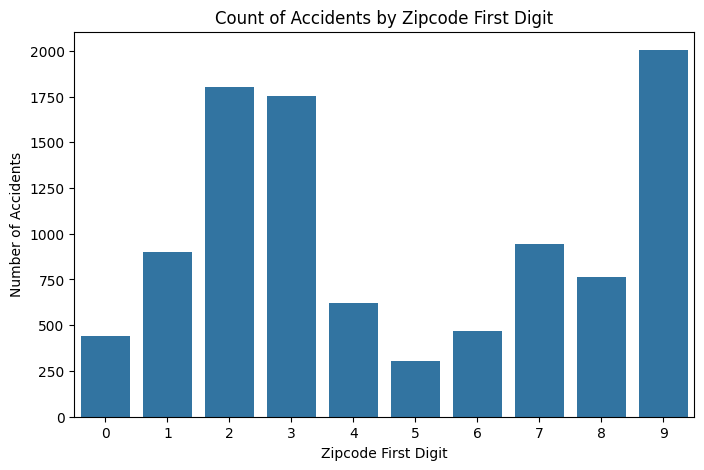

In [395]:
# Bar chart of zipcode
# Extract the first digit of the zip code (assuming the zip code is a string or integer)
sampled_data['Region'] = sampled_data['Zipcode'].str[0]

zipcode_counts = sampled_data['Region'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=zipcode_counts.index, y=zipcode_counts.values)

plt.xlabel("Zipcode First Digit")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by Zipcode First Digit")
plt.show()

In [396]:
sampled_data['Region'] = sampled_data['Region'].astype(int)

In [397]:
print(sampled_data.shape)
sampled_data.drop(columns=['Zipcode'], inplace=True)
print(sampled_data.shape)


(10000, 31)
(10000, 30)


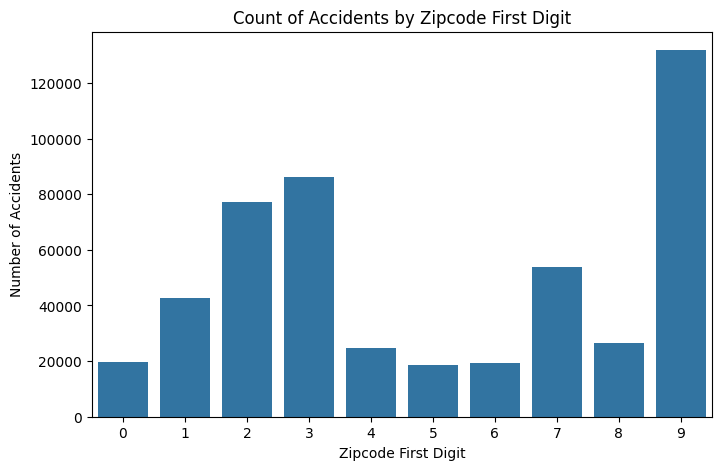

In [398]:
## Compare the distribution with original dataset
traffic_data['Region'] = traffic_data['Zipcode'].str[0]

zipcode_counts = traffic_data['Region'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=zipcode_counts.index, y=zipcode_counts.values)

plt.xlabel("Zipcode First Digit")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by Zipcode First Digit")
plt.show()

## Encode 'State' into Top 3 States and None of the Above

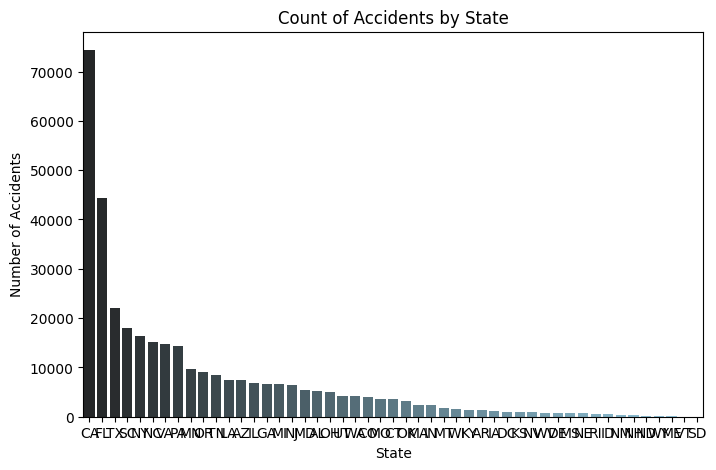

In [399]:
# Bar chart of state
## Use the original traffic data since the sampled data distribution might be distorted due to stratefied sampling
state_counts = remaining_df['State'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=state_counts.index, y=state_counts.values, hue=state_counts.index, palette='dark:skyblue')

plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by State")
plt.show()

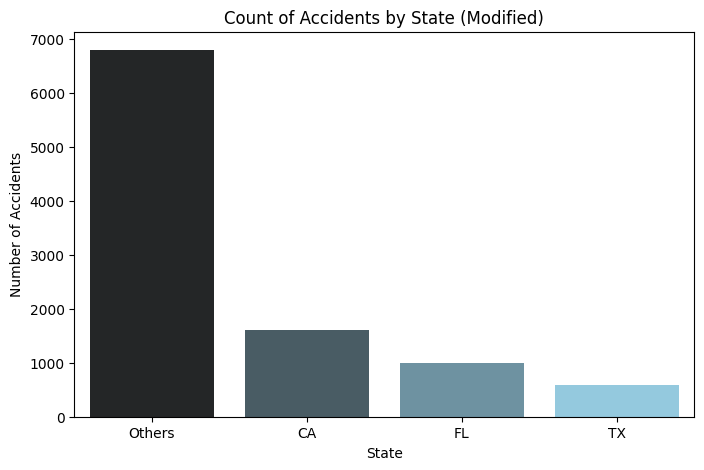

In [400]:
# Get the top 3 states
top_3 = state_counts.nlargest(3)

# Create a mapping where top 3 states are kept, and others are labeled as 'Others'
state_mapping = state_counts.index.to_series().apply(lambda x: x if x in top_3.index else 'Others')

# Apply the mapping to the 'State' column
sampled_data['State'] = sampled_data['State'].map(state_mapping)

# new Bar Chart for State
state_counts = sampled_data['State'].value_counts()
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=state_counts.index, y=state_counts.values, hue=state_counts.index, palette='dark:skyblue')

plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by State (Modified)")
plt.show()

In [401]:
# Perform One-Hot Encoding on the 'State' column
state_dummies = pd.get_dummies(sampled_data['State'], prefix='State')

# Convert True/False to 1/0 explicitly
state_dummies = state_dummies.astype(int)

# Concatenate the new columns with the original dataframe
sampled_data = pd.concat([sampled_data, state_dummies], axis=1)

# Drop the original 'State' column
sampled_data.drop(columns=['State'], inplace=True)

print(sampled_data.head())

        Severity  Start_Time  End_Time  Distance(mi)         City  \
239235         1          33        63          0.00  Pope Valley   
355666         1         484       499          0.00    Sausalito   
246955         1         809       839          0.15       Sumner   
264362         1         458       488          0.00  Albuquerque   
195152         1         349       426          0.00        Miami   

          Weather_Timestamp  Temperature(F)  Humidity(%)  Pressure(in)  \
239235  2020-06-24 00:53:00            56.0         90.0         29.71   
355666  2020-03-29 07:56:00            52.0         86.0         30.10   
246955  2022-08-10 13:08:00            68.0         83.0         29.71   
264362  2022-04-29 07:52:00            56.0         20.0         24.61   
195152  2022-05-23 05:53:00            79.0         77.0         30.07   

        Visibility(mi)  ...   Stop  Traffic_Calming  Traffic_Signal  \
239235            10.0  ...  False            False           False  

## Encode 'City' into Top 5 Cities and None of the above

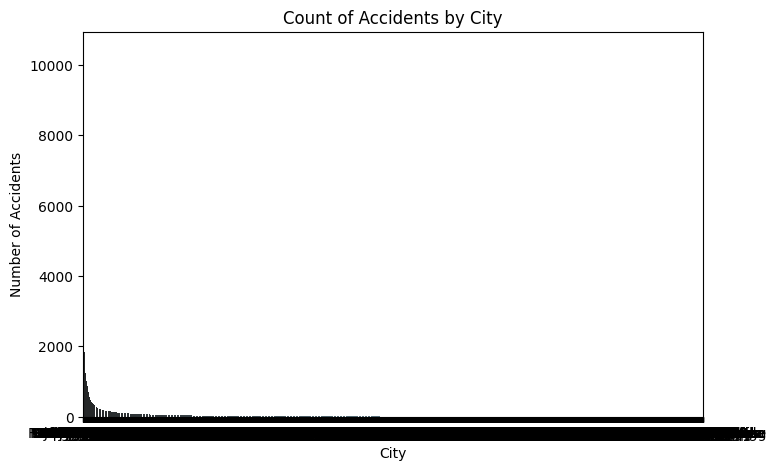

In [402]:
# Bar chart of city
## Use remaining_df (original dataset without valid-test set, to prevent data leakage and maintaining original data distribution)
city_counts = remaining_df['City'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=city_counts.index, y=city_counts.values, hue=city_counts.index, palette='dark:skyblue')

plt.xlabel("City")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by City")
plt.show()

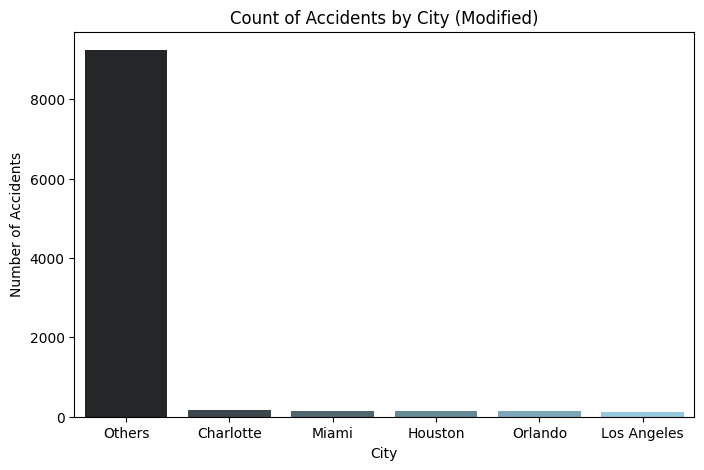

In [403]:
# Get the top 5 cities
top_5 = city_counts.nlargest(5)

# Create a mapping where top 5 cities are kept, and others are labeled as 'Others'
city_mapping = city_counts.index.to_series().apply(lambda x: x if x in top_5.index else 'Others')

# Apply the mapping to the 'City' column
sampled_data['City'] = sampled_data['City'].map(city_mapping)

# new Bar Chart for City
city_counts = sampled_data['City'].value_counts()
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=city_counts.index, y=city_counts.values, hue=city_counts.index, palette='dark:skyblue')

plt.xlabel("City")
plt.ylabel("Number of Accidents")
plt.title("Count of Accidents by City (Modified)")
plt.show()

In [404]:
# Perform One-Hot Encoding on the 'City' column
city_dummies = pd.get_dummies(sampled_data['City'], prefix='City')

# Convert True/False to 1/0 explicitly
city_dummies = city_dummies.astype(int)

# Concatenate the new columns with the original dataframe
sampled_data = pd.concat([sampled_data, city_dummies], axis=1)

# Drop the original 'City' column
sampled_data.drop(columns=['City'], inplace=True)

#print(sampled_data.head())

## Cluster 'Weather_Condition' into 6 Broad Categories then One-Hot Encoding


In [405]:
## Using remaining_df to get more weather_condition categories but still excluding valid and test data
print(remaining_df['Weather_Condition'].unique())

['Fair' 'Wintry Mix' 'Light Rain' 'Cloudy' 'Mostly Cloudy' 'Partly Cloudy'
 'Fog' 'T-Storm' 'Light Snow' 'Overcast' 'Thunder'
 'Light Rain with Thunder' 'Rain' 'Showers in the Vicinity'
 'Mostly Cloudy / Windy' 'Heavy Rain' 'Cloudy / Windy' 'Light Drizzle'
 'Heavy T-Storm' 'Light Rain / Windy' 'Smoke' 'Blowing Dust / Windy'
 'Haze' 'N/A Precipitation' 'Thunder in the Vicinity' 'Snow'
 'Scattered Clouds' 'Heavy Thunderstorms and Rain' 'Fair / Windy'
 'Patches of Fog' 'Light Snow / Windy' 'Blowing Snow / Windy' 'Drizzle'
 'T-Storm / Windy' 'Partly Cloudy / Windy' 'Shallow Fog' 'Clear'
 'Thunderstorms and Rain' 'Heavy Rain / Windy' 'Heavy Snow / Windy'
 'Light Thunderstorms and Rain' 'Rain / Windy' 'Light Freezing Rain'
 'Heavy Snow' 'Light Ice Pellets' 'Light Freezing Drizzle'
 'Heavy T-Storm / Windy' 'Heavy Drizzle' 'Sleet' 'Mist'
 'Light Rain Shower' 'Haze / Windy' 'Snow and Sleet' 'Snow / Windy'
 'Thunderstorm' 'Fog / Windy' 'Sleet / Windy' 'Light Sleet'
 'Sand / Dust Whirlwinds' 'Squ

In [406]:
# Mapping for standardizing weather conditions to 5 categories and "Others"
weather_mapping = {
    # Cloud is grouped in the same category as Clear as cloudy doesnt really affect traffic conditions that much
    'Clear': 'Clear / Cloudy', 'Cloudy': 'Clear / Cloudy', 'Partly Cloudy': 'Clear / Cloudy',
    'Mostly Cloudy': 'Clear / Cloudy', 'Overcast': 'Clear / Cloudy', 'Fair': 'Clear / Cloudy',
    'Fair / Windy': 'Clear / Cloudy', 'Mostly Cloudy / Windy': 'Clear / Cloudy', 'Partly Cloudy / Windy': 'Clear / Cloudy',
    'Cloudy / Windy': 'Clear / Cloudy', 'Scattered Clouds': 'Clear / Cloudy',

    'Light Rain': 'Rain', 'Rain': 'Rain', 'Heavy Rain': 'Rain', 'Light Rain Shower': 'Rain',
    'Rain / Windy': 'Rain', 'Heavy Rain / Windy': 'Rain', 'Drizzle': 'Rain',
    'Light Freezing Drizzle': 'Rain', 'Light Rain with Thunder': 'Rain', 'Light Drizzle': 'Rain',
    'Light Freezing Rain': 'Rain', 'Freezing Drizzle': 'Rain', 'Showers in the Vicinity': 'Rain',
    'Light Rain / Windy': 'Rain', 'Heavy Drizzle': 'Rain', 'Light Freezing Rain / Windy': 'Rain',
    'Light Drizzle / Windy': 'Rain', 'Freezing Rain': 'Rain', 'Light Rain Showers': 'Rain',
    'Light Rain Shower / Windy': 'Rain', 'Rain Showers': 'Rain', 'Drizzle / Windy': 'Rain',

    'Light Snow': 'Snow', 'Snow': 'Snow', 'Heavy Snow': 'Snow', 'Snow / Windy': 'Snow',
    'Light Snow Shower': 'Snow', 'Snow Grains': 'Snow', 'Blowing Snow': 'Snow',
    'Light Snow / Windy': 'Snow', 'Heavy Snow / Windy': 'Snow', 'Light Snow with Thunder': 'Snow',
    'Light Snow and Sleet': 'Snow', 'Snow and Sleet': 'Snow', 'Sleet / Windy': 'Snow',
    'Light Snow Showers': 'Snow', 'Light Snow and Sleet / Windy': 'Snow', 'Snow and Sleet / Windy': 'Snow',
    'Sleet': 'Snow', 'Light Sleet': 'Snow', 'Light Snow Showers': 'Snow', 'Ice Pellets': 'Snow',
    'Blowing Snow': 'Snow', 'Drifting Snow / Windy': 'Snow', 'Blowing Snow / Windy': 'Snow',
    'Snow and Thunder': 'Snow', 'Wintry Mix / Windy': 'Snow', 'Heavy Sleet': 'Snow',
    'Light Snow Grains': 'Snow', 'Light Blowing Snow': 'Snow', 'Light Ice Pellets': 'Snow',

    'Fog': 'Fog / Low Visibility', 'Shallow Fog': 'Fog / Low Visibility', 'Mist': 'Fog / Low Visibility',
    'Light Freezing Fog': 'Fog / Low Visibility', 'Fog / Windy': 'Fog / Low Visibility',
    'Partial Fog / Windy': 'Fog / Low Visibility', 'Drizzle and Fog': 'Fog / Low Visibility',
    'Patches of Fog': 'Fog / Low Visibility', 'Haze / Windy': 'Fog / Low Visibility',
    'Partial Fog': 'Fog / Low Visibility', 'Smoke': 'Fog / Low Visibility', 'Haze': 'Fog / Low Visibility',
    'Blowing Dust': 'Fog / Low Visibility', 'Blowing Dust / Windy': 'Fog / Low Visibility',
    'Sand / Dust Whirlwinds': 'Fog / Low Visibility', 'Widespread Dust': 'Fog / Low Visibility',
    'Smoke / Windy': 'Fog / Low Visibility', 'Widespread Dust / Windy': 'Fog / Low Visibility',

    'Thunderstorm': 'Thunderstorms / Severe Weather', 'T-Storm': 'Thunderstorms / Severe Weather',
    'Heavy T-Storm': 'Thunderstorms / Severe Weather', 'Thunderstorms and Rain': 'Thunderstorms / Severe Weather',
    'Light Thunderstorms and Rain': 'Thunderstorms / Severe Weather', 'Thunder / Windy': 'Thunderstorms / Severe Weather',
    'Thunder in the Vicinity': 'Thunderstorms / Severe Weather', 'Heavy Thunderstorms and Rain': 'Thunderstorms / Severe Weather',
    'Tornado': 'Thunderstorms / Severe Weather', 'Thunder / Wintry Mix': 'Thunderstorms / Severe Weather', 'Light Thunderstorms and Snow': 'Thunderstorms / Severe Weather',
    'Wintry Mix': 'Thunderstorms / Severe Weather', 'Thunder': 'Thunderstorms / Severe Weather', 'T-Storm / Windy': 'Thunderstorms / Severe Weather',
    'Heavy T-Storm / Windy': 'Thunderstorms / Severe Weather', 'Funnel Cloud': 'Thunderstorms / Severe Weather', 'Thunder and Hail': 'Thunderstorms / Severe Weather',
    'Hail': 'Thunderstorms / Severe Weather', 'Squalls': 'Thunderstorms / Severe Weather', 'Volcanic Ash': 'Thunderstorms / Severe Weather',
    'Squalls / Windy': 'Thunderstorms / Severe Weather', 'Small Hail': 'Thunderstorms / Severe Weather', 'Light Hail': 'Thunderstorms / Severe Weather',

    # Grouping other categories as "Others"
    'N/A Precipitation': 'Others'
}

sampled_data['Weather_Condition'] = sampled_data['Weather_Condition'].map(weather_mapping).fillna('Others')


In [407]:
print(sampled_data['Weather_Condition'])

239235    Clear / Cloudy
355666    Clear / Cloudy
246955    Clear / Cloudy
264362    Clear / Cloudy
195152    Clear / Cloudy
               ...      
395634    Clear / Cloudy
492951    Clear / Cloudy
15664     Clear / Cloudy
393801    Clear / Cloudy
423606    Clear / Cloudy
Name: Weather_Condition, Length: 10000, dtype: object


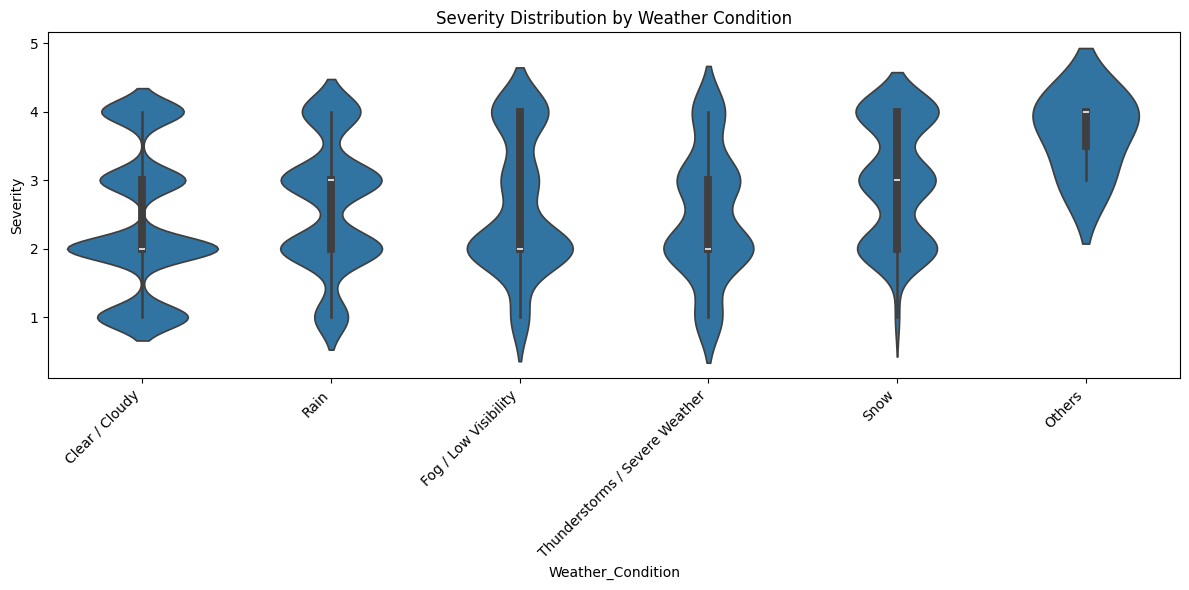

In [408]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=sampled_data, x='Weather_Condition', y='Severity')
plt.xticks(rotation=45, ha='right')
plt.title('Severity Distribution by Weather Condition')
plt.tight_layout()
plt.show()


In [409]:
# Perform One-Hot Encoding on the 'Weather_Condition' column
weather_condition_dummies = pd.get_dummies(sampled_data['Weather_Condition'], prefix='Weather_Condition')

# Convert True/False to 1/0 explicitly
weather_condition_dummies = weather_condition_dummies.astype(int)

# Concatenate the new columns with the original dataframe
sampled_data = pd.concat([sampled_data, weather_condition_dummies], axis=1)

# Drop the original 'Weather_Condition' column
sampled_data.drop(columns=['Weather_Condition'], inplace=True)

print(sampled_data.head())

        Severity  Start_Time  End_Time  Distance(mi)    Weather_Timestamp  \
239235         1          33        63          0.00  2020-06-24 00:53:00   
355666         1         484       499          0.00  2020-03-29 07:56:00   
246955         1         809       839          0.15  2022-08-10 13:08:00   
264362         1         458       488          0.00  2022-04-29 07:52:00   
195152         1         349       426          0.00  2022-05-23 05:53:00   

        Temperature(F)  Humidity(%)  Pressure(in)  Visibility(mi)  \
239235            56.0         90.0         29.71            10.0   
355666            52.0         86.0         30.10             8.0   
246955            68.0         83.0         29.71            10.0   
264362            56.0         20.0         24.61            10.0   
195152            79.0         77.0         30.07            10.0   

       Wind_Direction  ...  City_Los Angeles  City_Miami  City_Orlando  \
239235              S  ...                 0    

## Encode Weather Timestamp

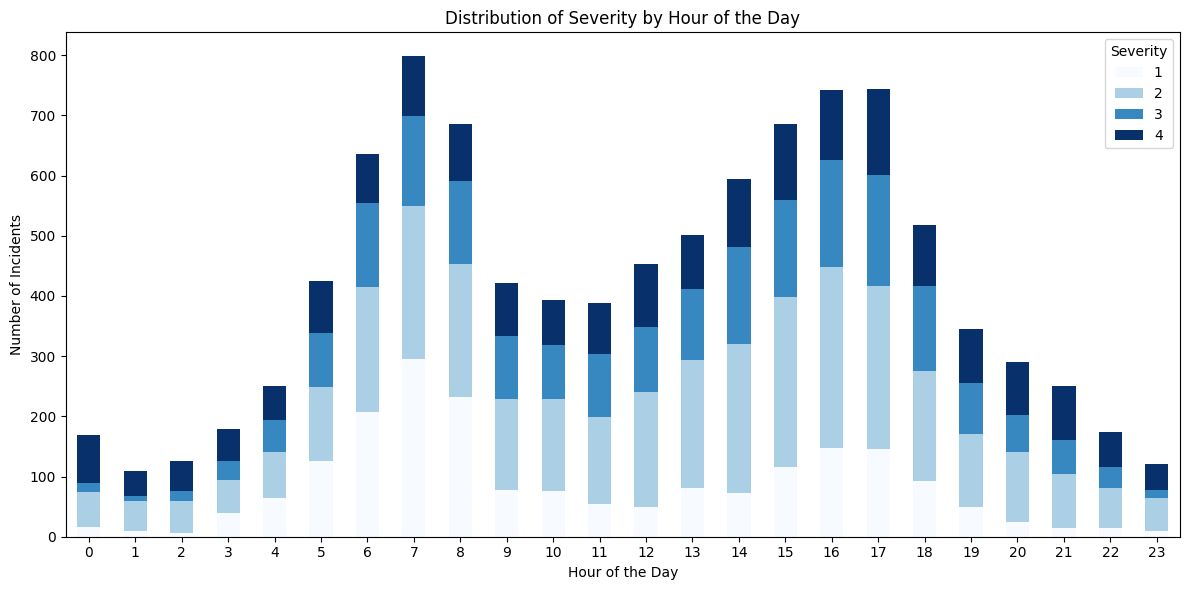

In [412]:
sampled_data['Hour'] = sampled_data['Weather_Timestamp'].dt.hour

severity_hour_counts = pd.crosstab(sampled_data['Hour'], sampled_data['Severity']).sort_index()
severity_hour_counts.plot(
    kind='bar',
    stacked=True,
    colormap='Blues',
    figsize=(12, 6)
)

plt.title('Distribution of Severity by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.legend(title='Severity')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


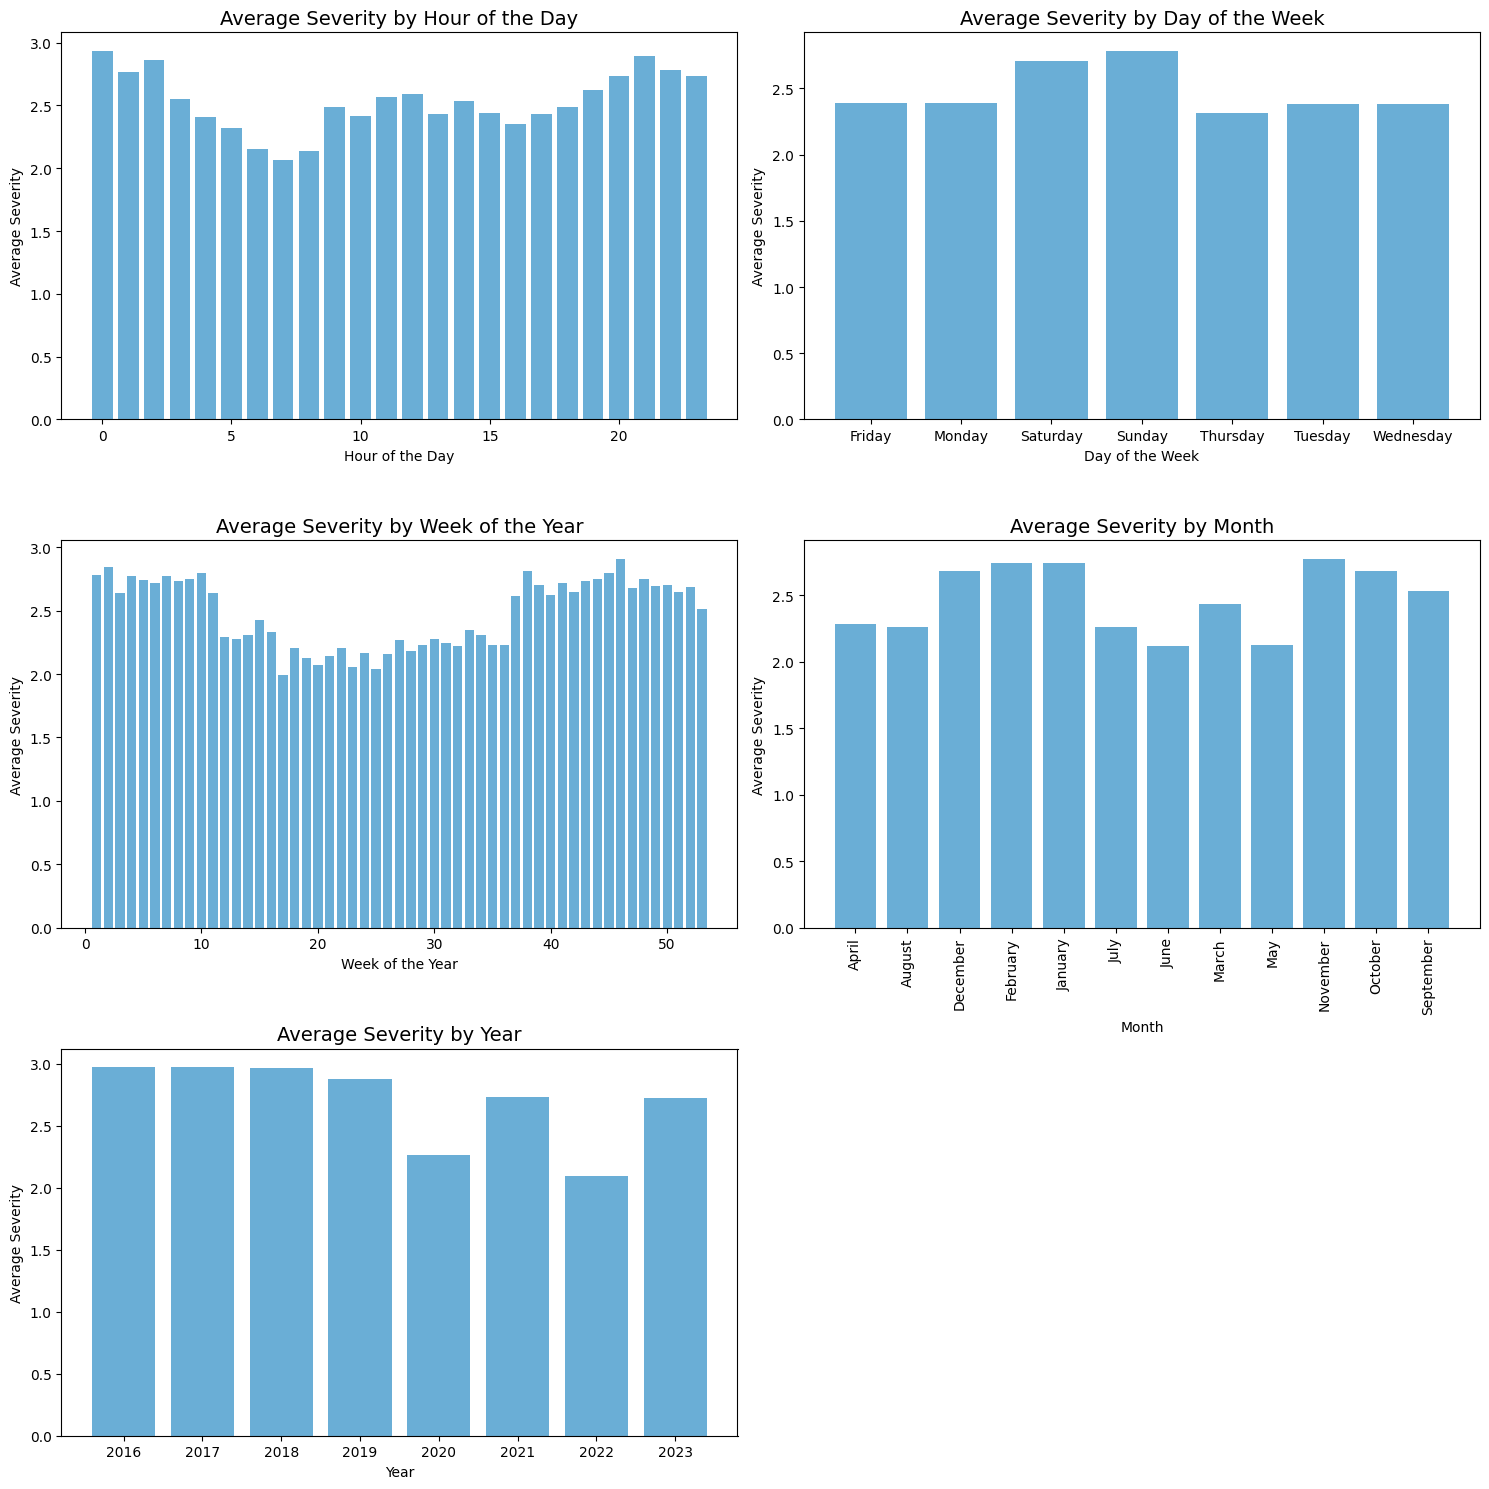

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.ticker as ticker
sampled_data['Weather_Timestamp'] = pd.to_datetime(sampled_data['Weather_Timestamp'], errors='coerce')

severity_by_time = sampled_data.groupby(sampled_data['Weather_Timestamp'].dt.hour)['Severity'].mean().sort_index()
severity_by_day = sampled_data.groupby(sampled_data['Weather_Timestamp'].dt.day_name())['Severity'].mean()
severity_by_week = sampled_data.groupby(sampled_data['Weather_Timestamp'].dt.isocalendar().week)['Severity'].mean().sort_index()
severity_by_month = sampled_data.groupby(sampled_data['Weather_Timestamp'].dt.month_name())['Severity'].mean()
severity_by_year = sampled_data.groupby(sampled_data['Weather_Timestamp'].dt.year)['Severity'].mean().sort_index()


fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# colors = ['#d6e6f4', '#abd0e6', '#6aaed6', '#3787c0', '#105ba4']
colors = ['#6aaed6', '#6aaed6', '#6aaed6', '#6aaed6', '#6aaed6']

def annotate_bars(ax, counts):
    # Annotate only the maximum and minimum values
    ax.text(counts.idxmax(), counts.max() + max(counts.values) * 0.02, f"{counts.max():,.0f}", 
            ha="center", fontsize=12, fontweight="bold", color='black')
    ax.text(counts.idxmin(), counts.min() + max(counts.values) * 0.02, f"{counts.min():,.0f}", 
            ha="center", fontsize=12, fontweight="bold", color='black')

    # Highlight max and min bars with different colors
    ax.bar(counts.idxmax(), counts.max(), color='#3787c0', edgecolor='black', linewidth=2, label="Max")  # Highlight max
    ax.bar(counts.idxmin(), counts.min(), color='#abd0e6', edgecolor='black', linewidth=2, label="Min")  # Highlight min



axs[0, 0].bar(severity_by_time.index, severity_by_time.values, color=colors[0])
# annotate_bars(axs[0, 0], incident_counts_by_time)
axs[0, 0].set_title('Average Severity by Hour of the Day', fontsize=14)
axs[0, 0].set_xlabel('Hour of the Day')
axs[0, 0].set_ylabel('Average Severity')

axs[0, 1].bar(severity_by_day.index, severity_by_day.values, color=colors[1])
axs[0, 1].set_title('Average Severity by Day of the Week', fontsize=14)
axs[0, 1].set_xlabel('Day of the Week')
axs[0, 1].set_ylabel('Average Severity')

axs[1, 0].bar(severity_by_week.index.astype(int), severity_by_week.values, color=colors[2])
axs[1, 0].set_title('Average Severity by Week of the Year', fontsize=14)
axs[1, 0].set_xlabel('Week of the Year')
axs[1, 0].set_ylabel('Average Severity')

axs[1, 1].bar(severity_by_month.index, severity_by_month.values, color=colors[3])
axs[1, 1].set_title('Average Severity by Month', fontsize=14)
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('Average Severity')
axs[1, 1].tick_params(axis='x', labelrotation=90)

axs[2, 0].bar(severity_by_year.index, severity_by_year.values, color=colors[4])
axs[2, 0].set_title('Average Severity by Year', fontsize=14)
axs[2, 0].set_xlabel('Year')
axs[2, 0].set_ylabel('Average Severity')

axs[2, 1].axis('off')

plt.tight_layout()
plt.show()


# for ax in axs.flat:
#     ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.tight_layout()
plt.show()

In [317]:
def encode_timestamp(df):
  df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'], errors='coerce')

  # Extract features
  df['Weather_Year'] = df['Weather_Timestamp'].dt.year
  df['Weather_Month'] = df['Weather_Timestamp'].dt.month
  df['Weather_Day'] = df['Weather_Timestamp'].dt.day
  df['Weather_Hour'] = df['Weather_Timestamp'].dt.hour
  df['Weather_Day_of_Week'] = df['Weather_Timestamp'].dt.day_name()  # Monday, Tuesday

  df.drop(columns=['Weather_Timestamp'], inplace=True)
  return df

In [318]:
sampled_data = encode_timestamp(sampled_data)

## Encode Wind Direction, Weather Day of Week

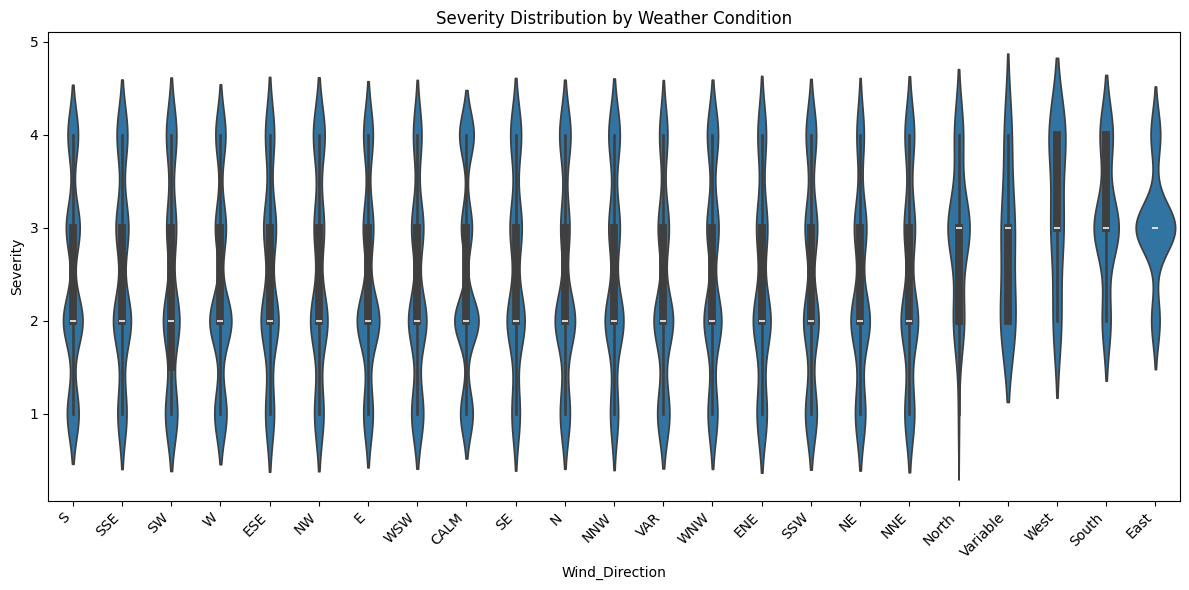

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=sampled_data, x='Wind_Direction', y='Severity')
plt.xticks(rotation=45, ha='right')
plt.title('Severity Distribution by Wind Direction')
plt.tight_layout()
plt.show()


In [319]:
# Perform One-Hot Encoding on the 'Wind_Direction' column
wind_direction_dummies = pd.get_dummies(sampled_data['Wind_Direction'], prefix='Wind_Direction')

# Convert True/False to 1/0 explicitly
wind_direction_dummies = wind_direction_dummies.astype(int)

# Concatenate the new columns with the original dataframe
sampled_data = pd.concat([sampled_data, wind_direction_dummies], axis=1)

# Drop the original 'Wind_Direction' column
sampled_data.drop(columns=['Wind_Direction'], inplace=True)

print(sampled_data.head())

        Severity  Start_Time  End_Time  Distance(mi)  Temperature(F)  \
239235         1          33        63          0.00            56.0   
355666         1         484       499          0.00            52.0   
246955         1         809       839          0.15            68.0   
264362         1         458       488          0.00            56.0   
195152         1         349       426          0.00            79.0   

        Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
239235         90.0         29.71            10.0              3.0   
355666         86.0         30.10             8.0              3.0   
246955         83.0         29.71            10.0             13.0   
264362         20.0         24.61            10.0              7.0   
195152         77.0         30.07            10.0             10.0   

        Precipitation(in)  ...  Wind_Direction_SSE  Wind_Direction_SSW  \
239235                0.0  ...                   0                   0  

In [320]:
# Perform One-Hot Encoding on the 'Weather_Day_of_Week' column
weather_day_of_week_dummies = pd.get_dummies(sampled_data['Weather_Day_of_Week'], prefix='Weather_Day_of_Week')

# Convert True/False to 1/0 explicitly
weather_day_of_week_dummies = weather_day_of_week_dummies.astype(int)

# Concatenate the new columns with the original dataframe
sampled_data = pd.concat([sampled_data, weather_day_of_week_dummies], axis=1)

# Drop the original 'Weather_Day_of_Week' column
sampled_data.drop(columns=['Weather_Day_of_Week'], inplace=True)

print(sampled_data.head())

        Severity  Start_Time  End_Time  Distance(mi)  Temperature(F)  \
239235         1          33        63          0.00            56.0   
355666         1         484       499          0.00            52.0   
246955         1         809       839          0.15            68.0   
264362         1         458       488          0.00            56.0   
195152         1         349       426          0.00            79.0   

        Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
239235         90.0         29.71            10.0              3.0   
355666         86.0         30.10             8.0              3.0   
246955         83.0         29.71            10.0             13.0   
264362         20.0         24.61            10.0              7.0   
195152         77.0         30.07            10.0             10.0   

        Precipitation(in)  ...  Wind_Direction_WNW  Wind_Direction_WSW  \
239235                0.0  ...                   0                   0  

## Convert Boolean Columns from "True"/"False" to 1/0

In [321]:
boolean_columns = [
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
    'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'
]

# Convert string 'True'/'False' to actual boolean values
sampled_data[boolean_columns] = sampled_data[boolean_columns].replace({'True': True, 'False': False})

# Convert True/False to 1/0 for the specified columns
sampled_data[boolean_columns] = sampled_data[boolean_columns].astype(int)

# print(sampled_data[boolean_columns].head())

# Train, Validate, Test Split (80-10-10)

In [322]:
train_data = sampled_data.groupby('Severity', group_keys=False).apply(lambda x: x.sample(2000, random_state=42))

valid_test_data = sampled_data.drop(train_data.index)

validate_data, test_data = train_test_split(valid_test_data, test_size=0.5, random_state=42)

print("Training Set Shape:", train_data.shape)
print("Validation Set Shape:", validate_data.shape)
print("Test Set Shape:", test_data.shape)

Training Set Shape: (8000, 75)
Validation Set Shape: (1000, 75)
Test Set Shape: (1000, 75)


/var/folders/m_/kb9mf0b90hb2fvtfccyd41fr0000gn/T/ipykernel_51433/1617880872.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_data = sampled_data.groupby('Severity', group_keys=False).apply(lambda x: x.sample(2000, random_state=42))


In [271]:
# # Split the data into training (80%) and temporary set (20%)
# train_data, temp_data = train_test_split(sampled_data, test_size=0.2, random_state=42)

# # Split the temporary set into validation (50%) and test (50%) — both 10% of the total data
# validate_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# # Check the shapes of the resulting sets
# print("Training Set Shape:", train_data.shape)
# print("Validation Set Shape:", validate_data.shape)
# print("Test Set Shape:", test_data.shape)

In [323]:
train_data.shape

(8000, 75)

In [324]:
save_file_path = '../../data'
# Save the training dataset
train_data.to_csv(f"{save_file_path}/train_data_v2.csv", index=False)

# Save the validation dataset
validate_data.to_csv(f"{save_file_path}/validate_data_v2.csv", index=False)

# Save the test dataset
test_data.to_csv(f"{save_file_path}/test_data_v2.csv", index=False)

In [325]:
# Check for duplicate samples between training and test sets
duplicates = pd.DataFrame(train_data).merge(pd.DataFrame(test_data), how='inner')
print("Number of duplicates between train and test:", len(duplicates))

Number of duplicates between train and test: 0


In [326]:
duplicates = pd.DataFrame(train_data).merge(pd.DataFrame(validate_data), how='inner')
print("Number of duplicates between train and test:", len(duplicates))

Number of duplicates between train and test: 0


In [327]:
duplicates = pd.DataFrame(validate_data).merge(pd.DataFrame(test_data), how='inner')
print("Number of duplicates between train and test:", len(duplicates))

Number of duplicates between train and test: 0
